# **Test Encoder**

In [1]:
# general imports
import torch

# import custom modules
import dataset_utils 
import layers

**Load and prepare dataset**

In [5]:
""" Hyperparameters"""
# training and setup
train_percent = 0.8
batch_size = 1 #(B)
lr = 0.001
epochs = 100

# model parameters
num_inputs = 10000 # number of input points (N)
num_latents = 500 # number of latent points (N')
dim = 500 # dimension of point embeddings (D)
num_query_points = 1000 # number of query points (M)


In [6]:
from torch.utils.data import DataLoader, random_split
from torch.utils.data import Subset

# load dataset
dataset = dataset_utils.SDFDataset("./cars100")


#! test overfitting
overfit_set = Subset(dataset, range(2)) # use only 1000 points for overfitting


In [7]:

# get set sizes for train and validation splits
train_size = 1 #int(train_percent * len(dataset))
val_size = 1 #len(dataset) - train_size
print(f"Dataset size: {len(dataset)}, Train size: {train_size}, Validation size: {val_size}")

# split dataset into training and validation sets
#train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# create data loaders for training and validation sets
train_loader = DataLoader(overfit_set, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(overfit_set, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

Dataset size: 100, Train size: 1, Validation size: 1


**Setup model**

In [8]:
# get device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# initialize model and optimizer
model = layers.KLAutoEncoder(num_inputs=num_inputs, num_latents=num_latents, dim = dim, queries_dim=dim).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [9]:
import trainer as t
# # from importlib import reload
# # reload(t)
t.train(model, train_loader, val_loader, optimizer, device, num_epochs=epochs, points_used = num_inputs, num_query_points=num_query_points)

  0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:03<00:00,  1.56s/it]


Epoch 1/100 - Validation Loss: 3.081251


100%|██████████| 2/2 [00:03<00:00,  1.90s/it]


Epoch 2/100 - Validation Loss: 3.931106


100%|██████████| 2/2 [00:03<00:00,  1.98s/it]


Epoch 3/100 - Validation Loss: 1.973270


100%|██████████| 2/2 [00:03<00:00,  1.99s/it]


Epoch 4/100 - Validation Loss: 1.453065


100%|██████████| 2/2 [00:03<00:00,  1.94s/it]


Epoch 5/100 - Validation Loss: 1.882247


100%|██████████| 2/2 [00:03<00:00,  1.95s/it]


Epoch 6/100 - Validation Loss: 0.237692


100%|██████████| 2/2 [00:04<00:00,  2.02s/it]


Epoch 7/100 - Validation Loss: 0.167220


100%|██████████| 2/2 [00:04<00:00,  2.20s/it]


Epoch 8/100 - Validation Loss: 0.307715


100%|██████████| 2/2 [00:04<00:00,  2.44s/it]


Epoch 9/100 - Validation Loss: 1.099523


100%|██████████| 2/2 [00:05<00:00,  2.81s/it]


Epoch 10/100 - Validation Loss: 0.603690


100%|██████████| 2/2 [00:06<00:00,  3.21s/it]


Epoch 11/100 - Validation Loss: 0.644423


100%|██████████| 2/2 [00:07<00:00,  3.83s/it]


Epoch 12/100 - Validation Loss: 0.456406


100%|██████████| 2/2 [00:07<00:00,  3.96s/it]


Epoch 13/100 - Validation Loss: 0.301963


100%|██████████| 2/2 [00:08<00:00,  4.38s/it]


Epoch 14/100 - Validation Loss: 0.440865


100%|██████████| 2/2 [00:08<00:00,  4.26s/it]


Epoch 15/100 - Validation Loss: 0.319682


100%|██████████| 2/2 [00:08<00:00,  4.40s/it]


Epoch 16/100 - Validation Loss: 0.266386


100%|██████████| 2/2 [00:08<00:00,  4.46s/it]


Epoch 17/100 - Validation Loss: 0.255623


100%|██████████| 2/2 [00:08<00:00,  4.42s/it]


Epoch 18/100 - Validation Loss: 0.170986


100%|██████████| 2/2 [00:09<00:00,  4.61s/it]


Epoch 19/100 - Validation Loss: 0.232660


100%|██████████| 2/2 [00:09<00:00,  4.54s/it]


Epoch 20/100 - Validation Loss: 0.168887


100%|██████████| 2/2 [00:09<00:00,  4.57s/it]


Epoch 21/100 - Validation Loss: 0.184070


100%|██████████| 2/2 [00:09<00:00,  4.61s/it]


Epoch 22/100 - Validation Loss: 0.189297


100%|██████████| 2/2 [00:09<00:00,  4.67s/it]


Epoch 23/100 - Validation Loss: 0.174452


100%|██████████| 2/2 [00:09<00:00,  4.65s/it]


Epoch 24/100 - Validation Loss: 0.166516


100%|██████████| 2/2 [00:09<00:00,  4.69s/it]


Epoch 25/100 - Validation Loss: 0.174071


100%|██████████| 2/2 [00:09<00:00,  4.64s/it]


Epoch 26/100 - Validation Loss: 0.178259


100%|██████████| 2/2 [00:09<00:00,  4.62s/it]


Epoch 27/100 - Validation Loss: 0.174536


100%|██████████| 2/2 [00:09<00:00,  4.66s/it]


Epoch 28/100 - Validation Loss: 0.167982


100%|██████████| 2/2 [00:09<00:00,  4.75s/it]


Epoch 29/100 - Validation Loss: 0.168308


100%|██████████| 2/2 [00:09<00:00,  4.75s/it]


Epoch 30/100 - Validation Loss: 0.169385


100%|██████████| 2/2 [00:09<00:00,  4.70s/it]


Epoch 31/100 - Validation Loss: 0.166997


100%|██████████| 2/2 [00:09<00:00,  4.66s/it]


Epoch 32/100 - Validation Loss: 0.170661


100%|██████████| 2/2 [00:09<00:00,  4.62s/it]


Epoch 33/100 - Validation Loss: 0.166334


100%|██████████| 2/2 [00:09<00:00,  4.63s/it]


Epoch 34/100 - Validation Loss: 0.169980


100%|██████████| 2/2 [00:09<00:00,  4.70s/it]


Epoch 35/100 - Validation Loss: 0.167175


100%|██████████| 2/2 [00:09<00:00,  4.72s/it]


Epoch 36/100 - Validation Loss: 0.171611


100%|██████████| 2/2 [00:09<00:00,  4.80s/it]


Epoch 37/100 - Validation Loss: 0.167376


100%|██████████| 2/2 [00:09<00:00,  4.78s/it]


Epoch 38/100 - Validation Loss: 0.166338


100%|██████████| 2/2 [00:09<00:00,  4.79s/it]


Epoch 39/100 - Validation Loss: 0.170778


100%|██████████| 2/2 [00:09<00:00,  4.74s/it]


Epoch 40/100 - Validation Loss: 0.167636


100%|██████████| 2/2 [00:09<00:00,  4.71s/it]


Epoch 41/100 - Validation Loss: 0.167245


100%|██████████| 2/2 [00:09<00:00,  4.78s/it]


Epoch 42/100 - Validation Loss: 0.163464


100%|██████████| 2/2 [00:09<00:00,  4.74s/it]


Epoch 43/100 - Validation Loss: 0.170741


100%|██████████| 2/2 [00:09<00:00,  4.69s/it]


Epoch 44/100 - Validation Loss: 0.164108


100%|██████████| 2/2 [00:09<00:00,  4.65s/it]


Epoch 45/100 - Validation Loss: 0.165657


100%|██████████| 2/2 [00:09<00:00,  4.70s/it]


Epoch 46/100 - Validation Loss: 0.167531


100%|██████████| 2/2 [00:09<00:00,  4.62s/it]


Epoch 47/100 - Validation Loss: 0.169149


100%|██████████| 2/2 [00:09<00:00,  4.68s/it]


Epoch 48/100 - Validation Loss: 0.162950


100%|██████████| 2/2 [00:09<00:00,  4.72s/it]


Epoch 49/100 - Validation Loss: 0.167435


100%|██████████| 2/2 [00:09<00:00,  4.62s/it]


Epoch 50/100 - Validation Loss: 0.165673


100%|██████████| 2/2 [00:09<00:00,  4.69s/it]


Epoch 51/100 - Validation Loss: 0.164653


100%|██████████| 2/2 [00:09<00:00,  4.68s/it]


Epoch 52/100 - Validation Loss: 0.169696


100%|██████████| 2/2 [00:09<00:00,  4.78s/it]


Epoch 53/100 - Validation Loss: 0.169050


100%|██████████| 2/2 [00:09<00:00,  4.63s/it]


Epoch 54/100 - Validation Loss: 0.169466


100%|██████████| 2/2 [00:09<00:00,  4.71s/it]


Epoch 55/100 - Validation Loss: 0.166981


100%|██████████| 2/2 [00:09<00:00,  4.65s/it]


Epoch 56/100 - Validation Loss: 0.162878


100%|██████████| 2/2 [00:09<00:00,  4.66s/it]


Epoch 57/100 - Validation Loss: 0.168001


100%|██████████| 2/2 [00:09<00:00,  4.77s/it]


Epoch 58/100 - Validation Loss: 0.167065


100%|██████████| 2/2 [00:09<00:00,  4.76s/it]


Epoch 59/100 - Validation Loss: 0.167117


100%|██████████| 2/2 [00:09<00:00,  4.69s/it]


Epoch 60/100 - Validation Loss: 0.172213


100%|██████████| 2/2 [00:09<00:00,  4.72s/it]


Epoch 61/100 - Validation Loss: 0.167030


100%|██████████| 2/2 [00:09<00:00,  4.79s/it]


Epoch 62/100 - Validation Loss: 0.168356


100%|██████████| 2/2 [00:09<00:00,  4.69s/it]


Epoch 63/100 - Validation Loss: 0.164233


100%|██████████| 2/2 [00:09<00:00,  4.64s/it]


Epoch 64/100 - Validation Loss: 0.164035


100%|██████████| 2/2 [00:09<00:00,  4.73s/it]


Epoch 65/100 - Validation Loss: 0.164316


100%|██████████| 2/2 [00:09<00:00,  4.68s/it]


Epoch 66/100 - Validation Loss: 0.168738


100%|██████████| 2/2 [00:09<00:00,  4.76s/it]


Epoch 67/100 - Validation Loss: 0.162927


100%|██████████| 2/2 [00:09<00:00,  4.66s/it]


Epoch 68/100 - Validation Loss: 0.170162


100%|██████████| 2/2 [00:09<00:00,  4.62s/it]


Epoch 69/100 - Validation Loss: 0.169349


100%|██████████| 2/2 [00:09<00:00,  4.65s/it]


Epoch 70/100 - Validation Loss: 0.170046


100%|██████████| 2/2 [00:09<00:00,  4.62s/it]


Epoch 71/100 - Validation Loss: 0.167954


100%|██████████| 2/2 [00:09<00:00,  4.74s/it]


Epoch 72/100 - Validation Loss: 0.170390


100%|██████████| 2/2 [00:09<00:00,  4.70s/it]


Epoch 73/100 - Validation Loss: 0.166490


100%|██████████| 2/2 [00:09<00:00,  4.66s/it]


Epoch 74/100 - Validation Loss: 0.165257


100%|██████████| 2/2 [00:09<00:00,  4.65s/it]


Epoch 75/100 - Validation Loss: 0.167962


100%|██████████| 2/2 [00:09<00:00,  4.64s/it]


Epoch 76/100 - Validation Loss: 0.164428


100%|██████████| 2/2 [00:09<00:00,  4.71s/it]


Epoch 77/100 - Validation Loss: 0.170298


100%|██████████| 2/2 [00:09<00:00,  4.65s/it]


Epoch 78/100 - Validation Loss: 0.169007


100%|██████████| 2/2 [00:09<00:00,  4.70s/it]


Epoch 79/100 - Validation Loss: 0.168837


100%|██████████| 2/2 [00:09<00:00,  4.63s/it]


Epoch 80/100 - Validation Loss: 0.166568


100%|██████████| 2/2 [00:09<00:00,  4.68s/it]


Epoch 81/100 - Validation Loss: 0.166692


100%|██████████| 2/2 [00:09<00:00,  4.78s/it]


Epoch 82/100 - Validation Loss: 0.166097


100%|██████████| 2/2 [00:09<00:00,  4.78s/it]


Epoch 83/100 - Validation Loss: 0.168605


100%|██████████| 2/2 [00:09<00:00,  4.79s/it]


Epoch 84/100 - Validation Loss: 0.166771


100%|██████████| 2/2 [00:09<00:00,  4.82s/it]


Epoch 85/100 - Validation Loss: 0.164234


100%|██████████| 2/2 [00:09<00:00,  4.82s/it]


Epoch 86/100 - Validation Loss: 0.167744


100%|██████████| 2/2 [00:09<00:00,  4.79s/it]


Epoch 87/100 - Validation Loss: 0.169877


100%|██████████| 2/2 [00:09<00:00,  4.84s/it]


Epoch 88/100 - Validation Loss: 0.162563


100%|██████████| 2/2 [00:09<00:00,  4.84s/it]


Epoch 89/100 - Validation Loss: 0.166300


100%|██████████| 2/2 [00:09<00:00,  4.80s/it]


Epoch 90/100 - Validation Loss: 0.165826


100%|██████████| 2/2 [00:09<00:00,  4.81s/it]


Epoch 91/100 - Validation Loss: 0.164500


100%|██████████| 2/2 [00:09<00:00,  4.76s/it]


Epoch 92/100 - Validation Loss: 0.169196


100%|██████████| 2/2 [00:09<00:00,  4.84s/it]


Epoch 93/100 - Validation Loss: 0.174462


100%|██████████| 2/2 [00:10<00:00,  5.17s/it]


Epoch 94/100 - Validation Loss: 0.168688


100%|██████████| 2/2 [00:10<00:00,  5.09s/it]


Epoch 95/100 - Validation Loss: 0.165852


100%|██████████| 2/2 [00:09<00:00,  4.97s/it]


Epoch 96/100 - Validation Loss: 0.165342


100%|██████████| 2/2 [00:09<00:00,  4.97s/it]


Epoch 97/100 - Validation Loss: 0.165307


100%|██████████| 2/2 [00:09<00:00,  4.96s/it]


Epoch 98/100 - Validation Loss: 0.168833


100%|██████████| 2/2 [00:09<00:00,  4.92s/it]


Epoch 99/100 - Validation Loss: 0.166341


100%|██████████| 2/2 [00:09<00:00,  4.78s/it]


Epoch 100/100 - Validation Loss: 0.169948


In [10]:
# save model
torch.save(model.state_dict(), "klautoencoder.pth")

# load model
# model = layers.KLAutoEncoder(num_inputs=num_inputs, num_latents=num_latents, dim = dim).to(device)
# model.load_state_dict(torch.load("klautoencoder.pth", map_location=device))

In [11]:
def test_model(example, num_query = 10000):
    B, N, D = example.shape
    
    """ Sample from point clouds in the example """ # (each example contains multiple point clouds)
    ### input points ###
    sample_pos = torch.zeros((B, num_inputs, 3), device=device) # shape [B, num_inputs, 3] - surface points sampled from each shape in the example

    for i in range(B):
        shape = example[i]  # [N, 4]
        surface_pts = shape[shape[:, 3] == 0]  # sdf == 0 → surface points
        # Random sample
        sample_idx = torch.randperm(surface_pts.shape[0])[:num_inputs]
        sample_pos[i] = surface_pts[sample_idx, :3]  # only x,y,z
    
    ### query points ###
    querys_idx = torch.randint(0, N, (B, num_query), device=example.device) # dim = (B, num_query)
    query_idx = torch.arange(B, device=example.device).unsqueeze(1).expand(-1, num_query) # [B, num_query]
    # use advanced indexing to gather the sampled points
    query_points = example[query_idx, querys_idx] # [B, query_points, 4]
    query_pos = query_points[:, :, :3].to(device) # [B, num_inputs, 3]
    query_sdf = query_points[:, :, 3].to(device)   # shape [B, query_points]
    """ """

    outputs = model(sample_pos, query_pos)
    sdf_values = outputs['sdf'].unsqueeze(-1)

    combined = torch.cat([query_pos, sdf_values], dim=-1)[0]  # return only result for first shape
    return combined

def totally_random(example):
    shape0 = example[0]
    query_idx = torch.randperm(shape0.shape[0])[:10000]
    queries = shape0[query_idx].unsqueeze(0) # [1, 2048, 4]
    query_pos = queries[:, :, :3].to(device) # [B, num_inputs, 3]
    sdf_values = torch.rand(1, 10000, 1) - 0.15
    combined = torch.cat([query_pos.cpu(), sdf_values.cpu()], dim=-1)  # shape [1, 512, 4]
    return combined

torch.Size([1, 50000, 4])
TRUE


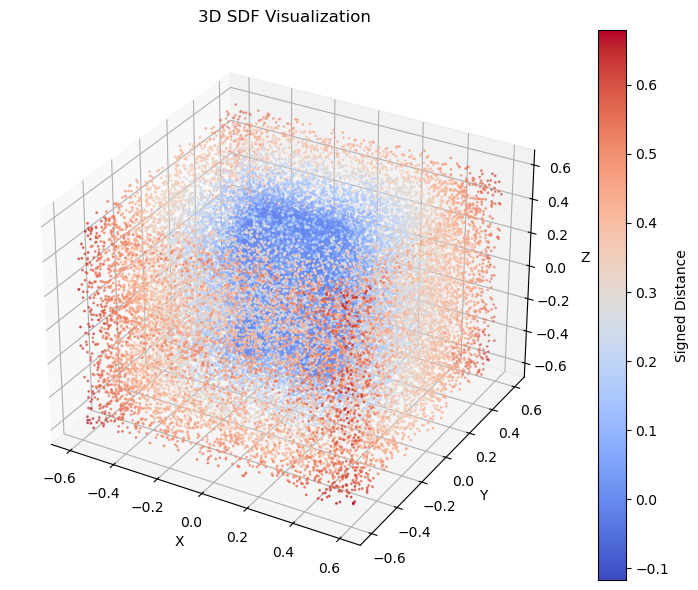

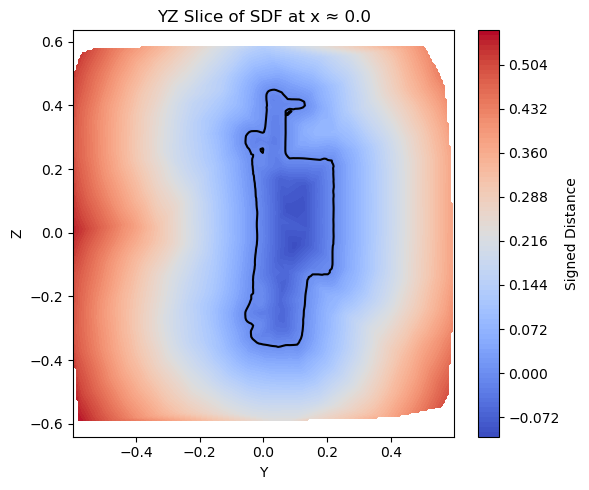

MODEL


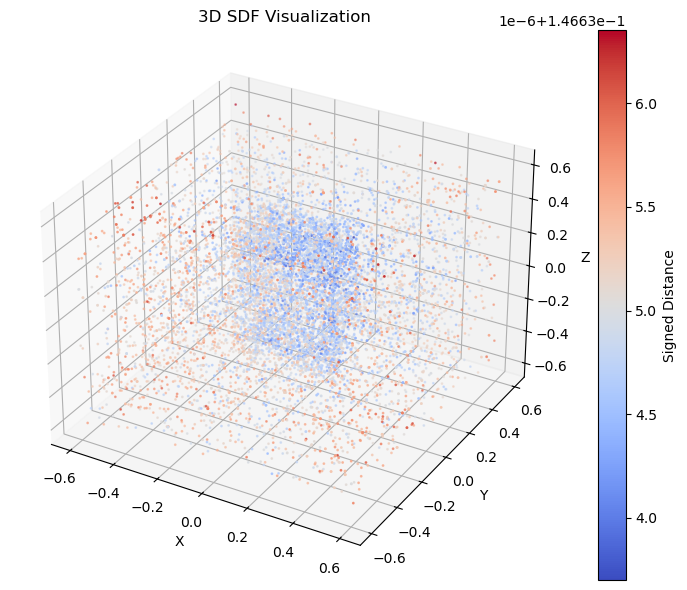

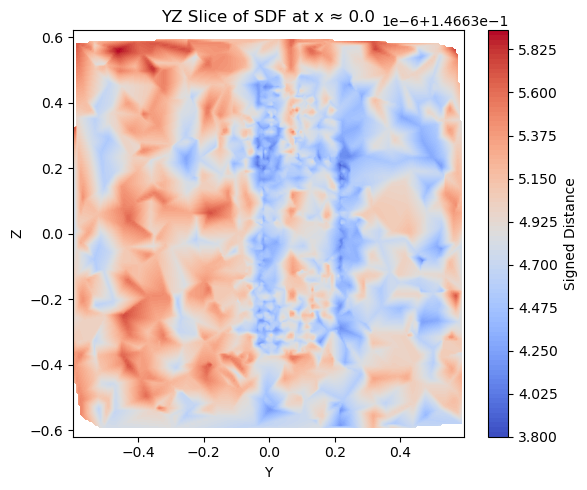

TOTALLY RANDOM


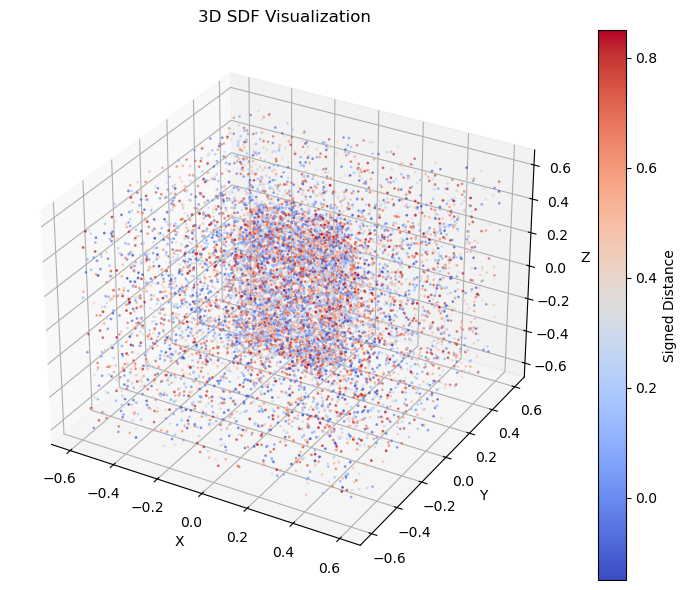

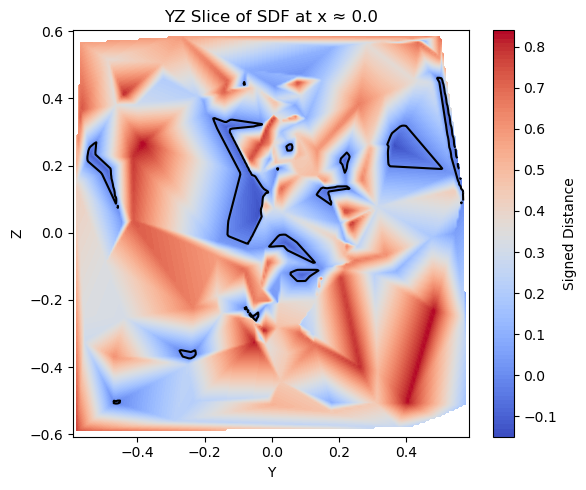

In [12]:
import dataset_utils
model.eval()
example = next(iter(train_loader))
print(example.shape)
pred = test_model(example).squeeze(0).cpu()
rand = totally_random(example).squeeze(0)

# dataset_utils.visualize_sdf_2d(pred.detach().cpu())
print("TRUE")
example = example[0]
dataset_utils.visualize_sdf_3d(example)
dataset_utils.visualize_sdf_2d(example)
print("MODEL")
dataset_utils.visualize_sdf_3d(pred.detach().cpu())
dataset_utils.visualize_sdf_2d(pred.detach().cpu(), tolerance=0.1)
print("TOTALLY RANDOM")
dataset_utils.visualize_sdf_3d(rand)
dataset_utils.visualize_sdf_2d(rand)
